In [68]:
# importing the required libraries
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

'1.19.5'

In [54]:
# load data
stock = 'AAPL' #name of stock

begin = dt.datetime(2012,1,1) #start date
end = dt.datetime(2020,1,1) #end date

input_data = web.DataReader(stock, 'yahoo', begin, end) #getting data from the yahoo page

In [55]:
# prep data
scaler = MinMaxScaler(feature_range=(0,1)) #scale the data between 0 and 1
scaled_data = scaler.fit_transform(input_data['Close'].values.reshape(-1,1)) #check later

duration = 60 #duration of 

x_train = []
y_train = []

for x in range(duration,len(scaled_data)):
    x_train.append(scaled_data[x-duration:x,0])
    y_train.append(scaled_data[x,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [53]:
# build model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32, verbose=2)

TypeError: __init__() missing 1 required positional argument: 'units'

In [43]:
#load data
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(stock, 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((input_data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - duration:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [44]:
#predictions for test
x_test = []
for x in range(duration, len(model_inputs)):
    x_test.append(model_inputs[x-duration:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

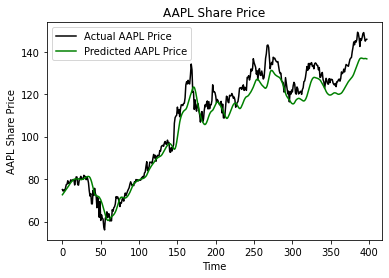

In [45]:
#plot
plt.plot(actual_prices, color = "black", label = f"Actual {stock} Price")
plt.plot(predicted_prices, color = "green", label = f"Predicted {stock} Price")
plt.title(f"{stock} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{stock} Share Price')
plt.legend()
plt.show()